## Описание проекта

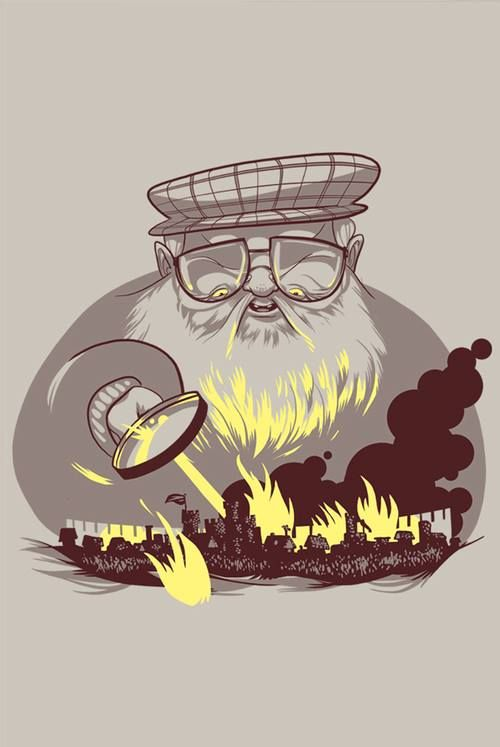

В данном задании работал с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). В задании нужно было предсказать, кто умрет, а кто останется в живых.


Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

## Часть 1. Анализ и предобработка данных


* Предобработка данных:
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных:
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 55.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 35.1MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col = "S.No") #train датасет

In [ ]:
data1 = pd.read_csv("/content/game_of_thrones_test.csv", index_col = "S.No") #test датасет

In [ ]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Обработка пропущенных значений**

In [ ]:
data.isna().sum() #поиск NaN'ов

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [ ]:
data.fillna({'dateOfBirth': data['dateOfBirth'].median(), 'age': data['age'].median()}, inplace=True) #заполнил столбцы с датой рождения и возрастом медианой (использовал словари, потому что без них могла быть ошибка при создании копий таблицы)
data['house'] = data['house'].fillna('Unk') #пропуски в столбце house заполнял "заглушкой" Unk
#в остальных столбцах пропуски заполню дальше, если эти столбцы понадобятся

In [ ]:
data1.fillna({'dateOfBirth': data['dateOfBirth'].median(), 'age': data['age'].median()}, inplace=True) #аналогично для тестовых данных
data1['house'] = data1['house'].fillna('Unk')

**Новые признаки**
* isPopular. Пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* boolDeadRelations. Упростил признак numDeadRelations и просто поделил людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростил признак culture, объединив схожие названия в одни


In [ ]:
data.loc[(data.popularity >= 0.5), ['isPopular']] = 1 #создание признака isPopular
data.loc[(data.popularity < 0.5), ['isPopular']] = 0
data.loc[(data.numDeadRelations > 0), ['boolDeadRelations']] = 1 #создание признака boolDeadRelations
data.loc[(data.numDeadRelations == 0), ['boolDeadRelations']] = 0

In [ ]:
data1.loc[(data1.popularity >= 0.5), ['isPopular']] = 1 #аналогично для тестовых данных
data1.loc[(data1.popularity < 0.5), ['isPopular']] = 0
data1.loc[(data1.numDeadRelations > 0), ['boolDeadRelations']] = 1
data1.loc[(data1.numDeadRelations == 0), ['boolDeadRelations']] = 0

In [ ]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'lhazareen': ['lhazareen', 'lhazarene'],
}

In [ ]:
data['culture'] = data['culture'].fillna('Unk') #заполнение NaN'ов заглушкой
data['culture'] = data['culture'].str.lower() #перевод данных в столбце сulture к нижнему регистру для упрощения обработки
for cults in cult:
    data['culture'] = data['culture'].replace(cult[cults], cults) #упрощение признака culture
valid_cultures = set(cult.keys()) #cоздал набор уникальных значений из словаря с культурами

data['culture'] = data['culture'].apply(lambda x: x if x in valid_cultures else 'other') #оставлю в словаре только культуры, которые есть в словаре (остальные и пропуски Unk меняю на other)

In [ ]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,other,272.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,Unk,NaN,...,0.0,NaN,0,0,24.0,11,0.605351,0,1.0,1.0
2,Walder Frey,Lord of the Crossing,1,other,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,1.0,1,1,97.0,1,0.896321,1,1.0,1.0
3,Addison Hill,Ser,1,other,272.0,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,0,1,24.0,0,0.267559,1,0.0,0.0
4,Aemma Arryn,Queen,0,other,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,0.0,1,1,23.0,0,0.183946,0,0.0,0.0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,1.0,1,1,29.0,0,0.043478,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,other,272.0,NaN,NaN,NaN,Unk,NaN,...,NaN,NaN,0,1,24.0,0,0.160535,1,0.0,0.0
1554,Masha Heddle,NaN,0,other,272.0,NaN,NaN,NaN,Unk,NaN,...,NaN,NaN,0,0,24.0,0,0.040134,0,0.0,0.0
1555,Matthos Seaworth,NaN,1,other,272.0,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,0,0,24.0,0,0.076923,0,0.0,0.0


In [ ]:
data1['culture'] = data1['culture'].fillna('Unk') #аналогично для тестовых данных
data1['culture'] = data1['culture'].str.lower()
for cults in cult:
    data1['culture'] = data1['culture'].replace(cult[cults], cults)
valid_cultures = set(data['culture'])

data1['culture'] = data1['culture'].apply(lambda x: x if x in valid_cultures else 'other')

In [ ]:
data1

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,other,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,NaN,NaN,NaN,0,0,100.0,0,0.050167,0.0,0.0
1559,Melisandre,NaN,0,other,272.0,NaN,NaN,NaN,R'hllor,NaN,...,NaN,NaN,NaN,0,0,24.0,0,0.745819,1.0,0.0
1560,Merrit,NaN,0,other,272.0,NaN,NaN,NaN,Brotherhood without banners,NaN,...,NaN,NaN,NaN,0,0,24.0,0,0.010033,0.0,0.0
1561,Meryn Trant,Ser,1,other,272.0,NaN,NaN,NaN,House Trant,NaN,...,NaN,NaN,NaN,0,1,24.0,0,0.220736,0.0,0.0
1562,Merrett Frey,NaN,1,other,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,NaN,NaN,1.0,1,0,38.0,0,0.434783,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westerosi,272.0,NaN,NaN,NaN,House Stark,NaN,...,NaN,NaN,NaN,0,0,24.0,0,0.351171,0.0,0.0
1943,Reek,NaN,1,other,272.0,NaN,NaN,NaN,House Bolton,NaN,...,NaN,NaN,NaN,0,0,24.0,0,0.096990,0.0,0.0
1944,Symeon Star-Eyes,NaN,1,other,272.0,NaN,NaN,NaN,Unk,NaN,...,NaN,NaN,NaN,0,0,24.0,0,0.030100,0.0,0.0


**Анализ признаков**

In [ ]:
data['title'].nunique()
#примерно половина пропусков в столбце title, при этом уникальных значений много - удаляю столбец

195

In [ ]:
data.drop(columns=['name', 'title', 'mother',	'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse','numDeadRelations','popularity'], inplace = True)
#столбцы name, mother, father, heir, spouse содержат уникальные значения (для каждого объекта разные), не повлияют на целевую переменную
#в столбцах isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse много пропусков, тоже удаляю
#столбцы numDeadRelations,popularity заменил на новые

In [ ]:
data1.drop(columns=['name', 'title', 'mother',	'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse','numDeadRelations','popularity'], inplace = True) #удаление ненужных столбцов

In [ ]:
data['age_plus_date'] = data['age'] + data['dateOfBirth'] #создаю новый признак - сумму возраста и года рождения

In [ ]:
data1['age_plus_date'] = data1['age'] + data1['dateOfBirth']

Проанализировал целевую переменную. Так как мы говорим о задаче классификации, то проанализировал является ли датасет сбалансированным по классам.

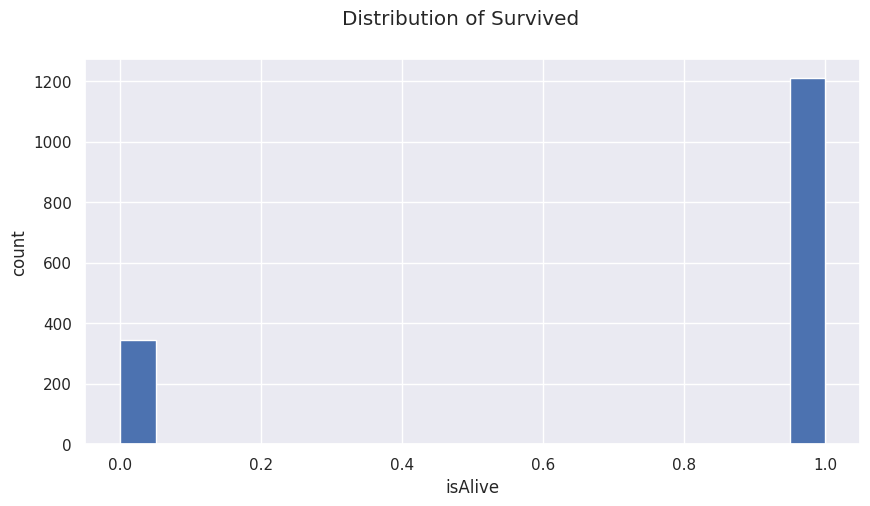

In [ ]:
#целевая переменная - категориальная
#анализ датасета на сбалансированность:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of Survived')
plt.show()

#датасет несбалансирован, но критичного перевеса нет

**Анализ признаков**
  * Обработал категориальные признаки и перевел их в числа
  * Проанализировал количественные признаки

In [ ]:
unprocessed = ['culture', 'house'] #признаки для one-hot кодировки

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False) #one-hot кодировка
one_hot_encoded = encoder.fit_transform(data[unprocessed])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed), index=data.index)

In [ ]:
data_encoded = pd.concat([data, one_hot_df], axis=1)
data_encoded.drop(columns=unprocessed, inplace = True) #сконкатенировал с новыми столбцами, старые удалил

In [ ]:
data_encoded #дальше буду работать с этой таблицей

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Unk,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272.0,0,0,0,0,0,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,208.0,1,1,1,1,1,1,1,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,272.0,0,0,0,1,0,0,1,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,82.0,0,0,0,0,0,1,1,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,276.0,0,0,0,1,0,1,1,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,272.0,1,0,1,1,0,0,1,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1554,0,272.0,1,1,0,0,0,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1555,1,272.0,0,1,1,1,1,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for col in unprocessed: #по значениям тестовых данных проходимся с тем же кодировщиком, чтобы не было ошибок если появятся новые значения
    data1[col] = data1[col].apply(lambda x: x if x in encoder.categories_[unprocessed.index(col)] else 'Unk') #если появляются новые значение и NaN'ы меняем на Unk
one_hot_encoded_1 = encoder.transform(data1[unprocessed])
one_hot_df_1 = pd.DataFrame(one_hot_encoded_1, columns=encoder.get_feature_names_out(unprocessed), index=data1.index)
data1_encoded = pd.concat([data1, one_hot_df_1], axis=1)
data1_encoded.drop(columns=unprocessed, inplace=True)

In [ ]:
data1_encoded

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Unk,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,156.0,0,0,0,0,1,0,0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1559,0,272.0,0,1,1,1,1,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,0,272.0,0,0,1,1,0,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1561,1,272.0,1,1,1,1,1,0,1,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1562,1,262.0,1,1,1,1,1,1,0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,272.0,1,1,1,1,1,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,1,272.0,0,1,0,1,1,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1944,1,272.0,1,1,1,1,1,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


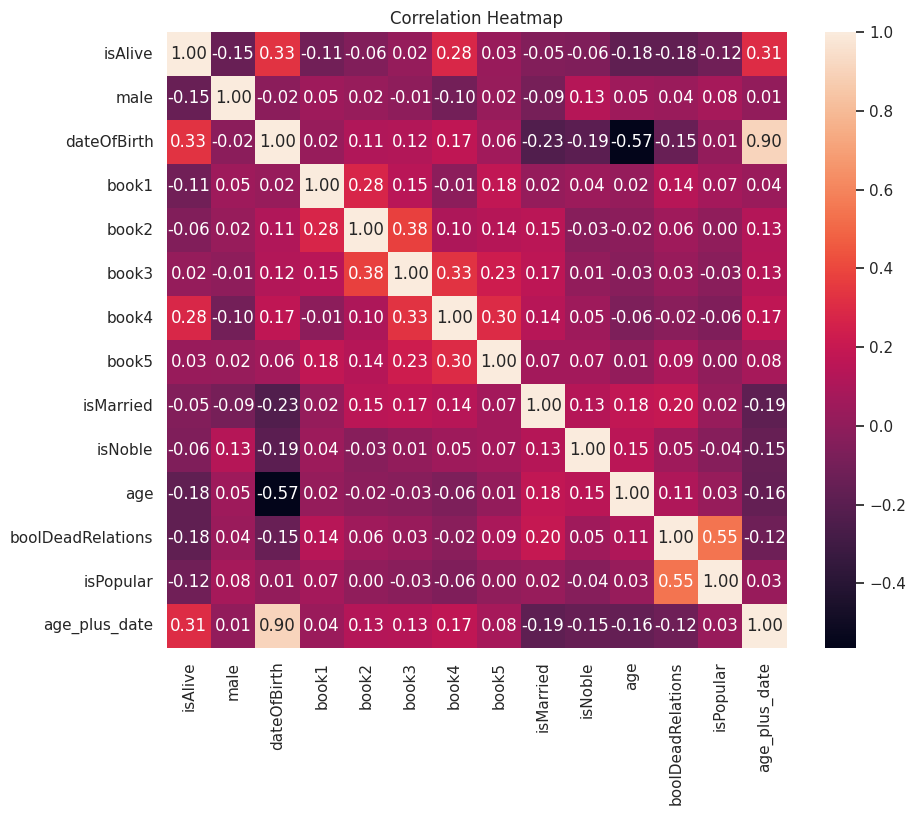

In [ ]:
columns = ['isAlive', 'male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'age', 'boolDeadRelations', 'isPopular', 'age_plus_date']
corr_matrix = data[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0)

plt.title("Correlation Heatmap")
plt.show()

#для признака isAlive видим наибольшую корреляцию с dateOfBirth, book4, age, boolDeadRelations, age_plus_date
#между собой коррелируют age, dateOfBirth и age_plus_date; isPopular и boolDedaRelations и все book'и попарно

#удаление каких-то из столбцов age, dateOfBirth и age_plus_date вело к значительному ухудшению модели у меня, так оставил все три

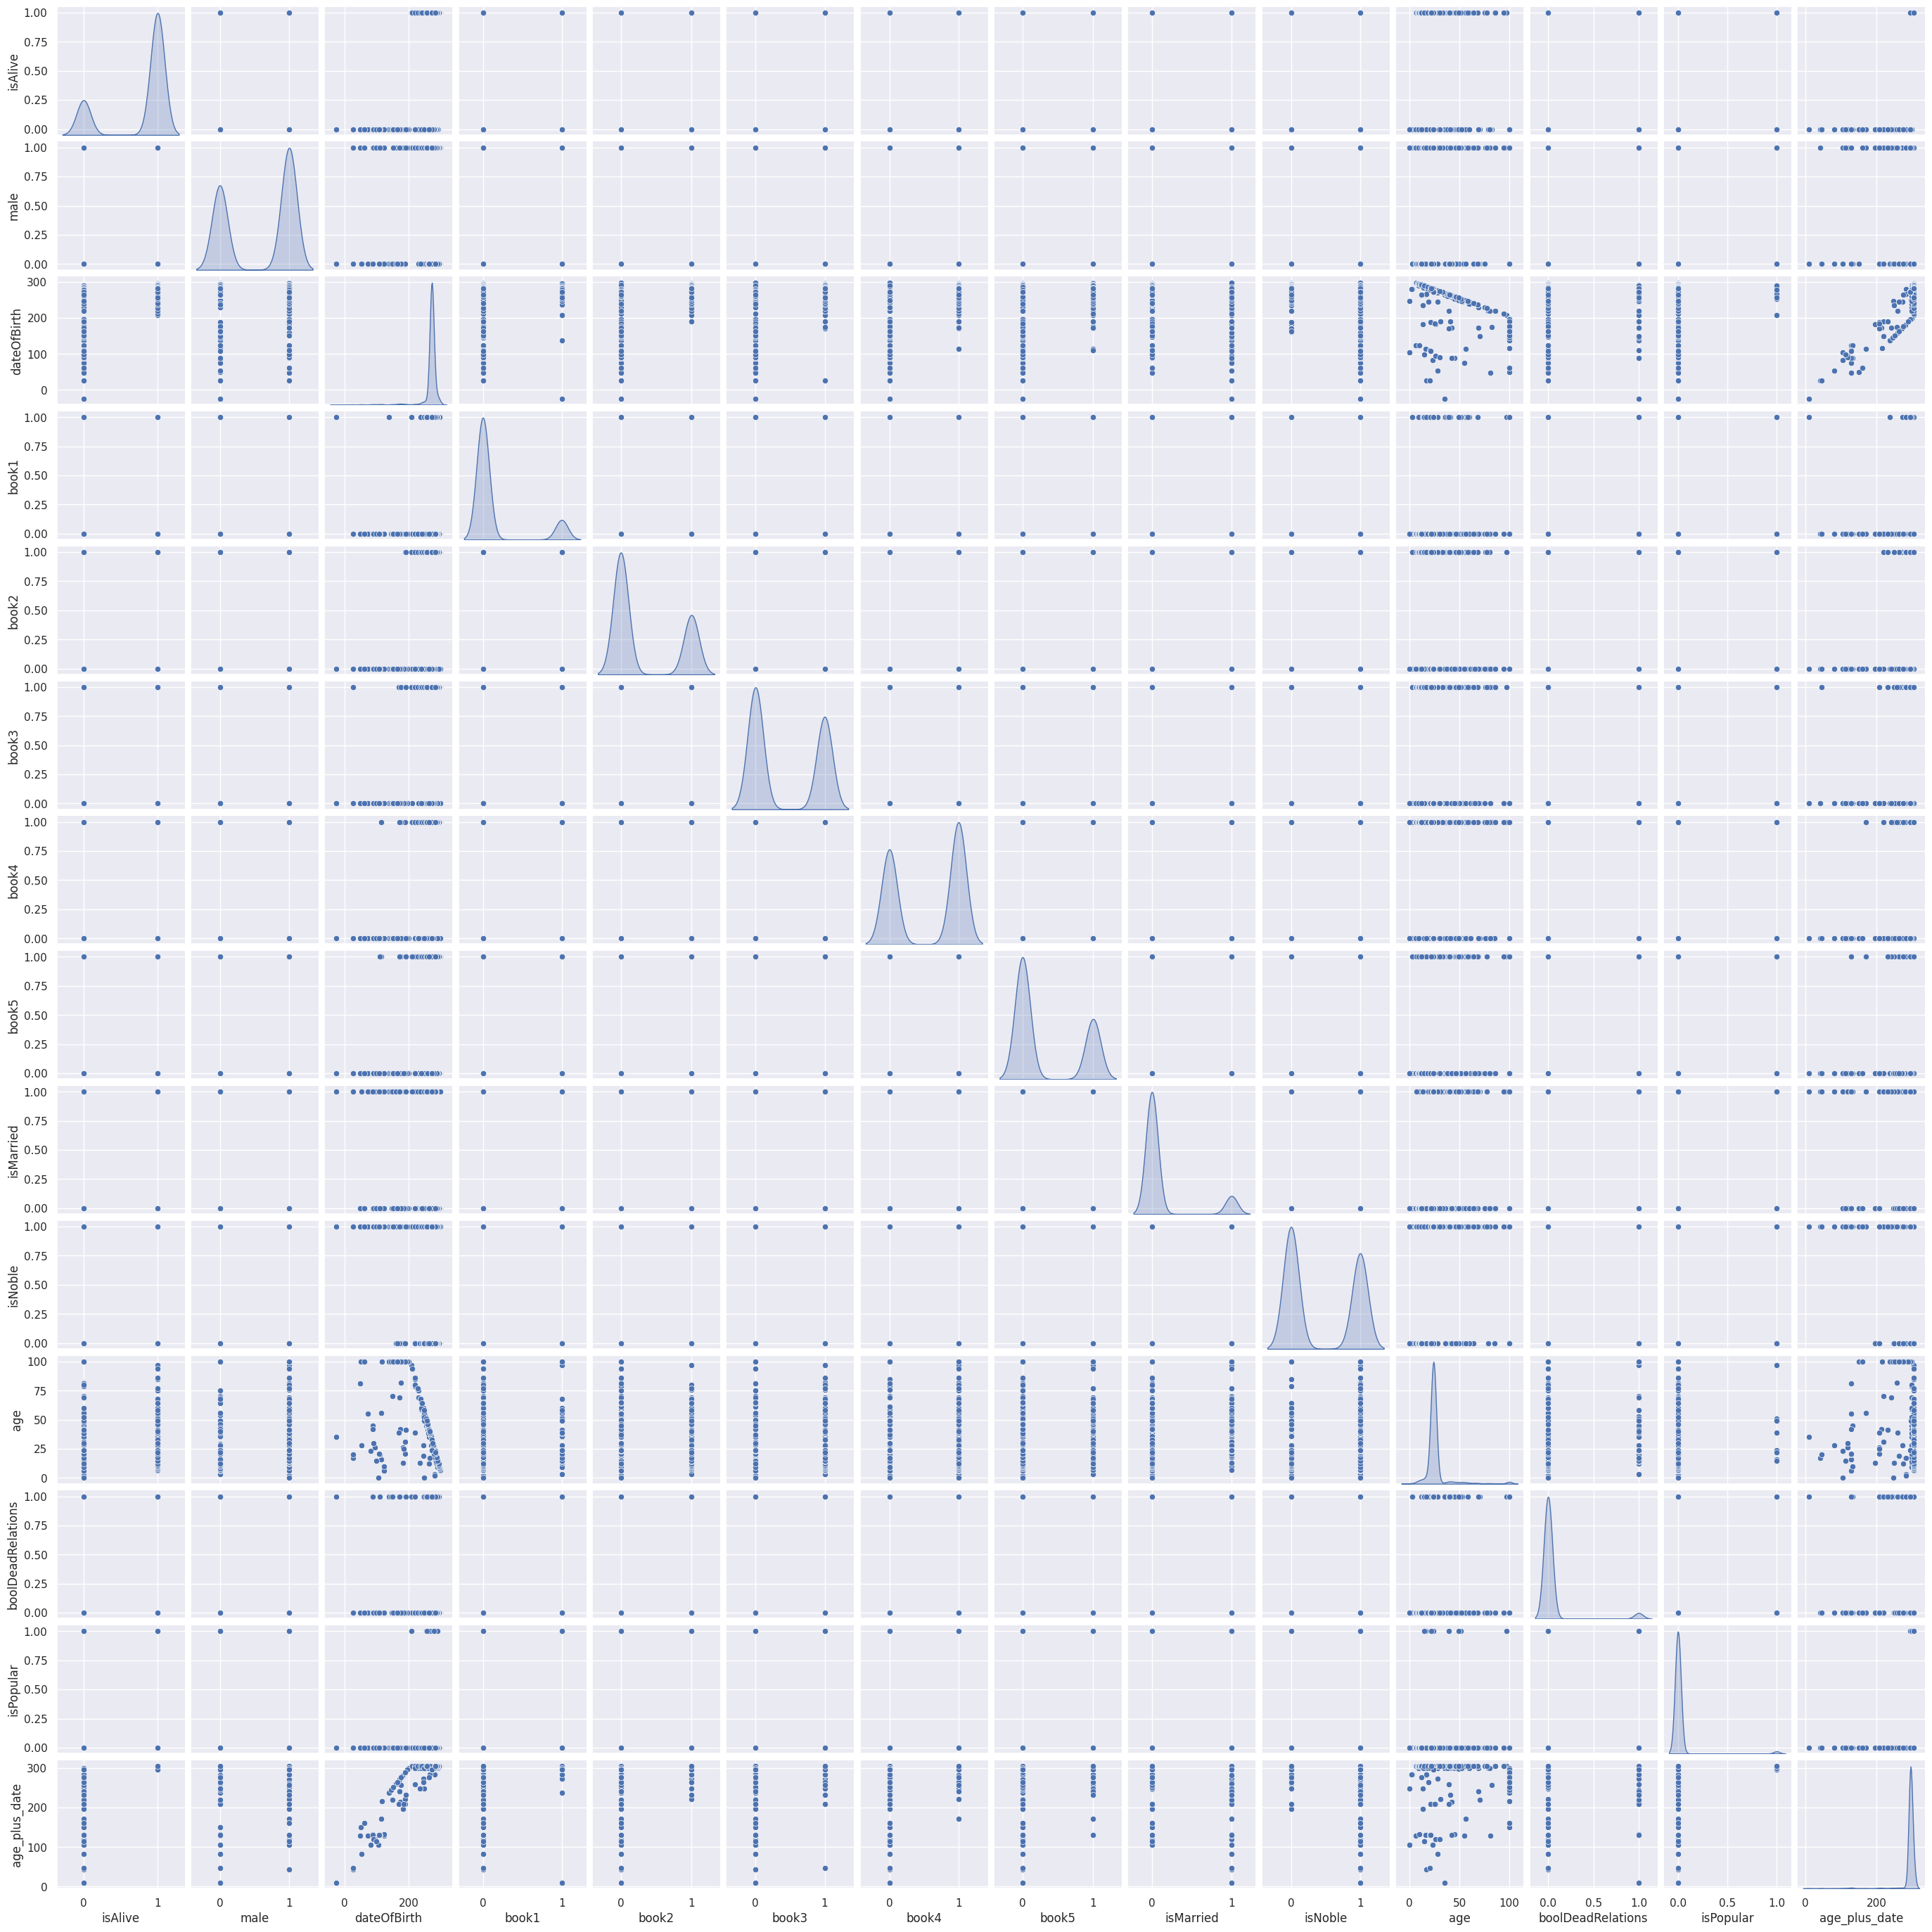

In [ ]:
sns.set()
sns.pairplot(data[columns], height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()

**Проанализировал влияние признаков на целевую переменную** .

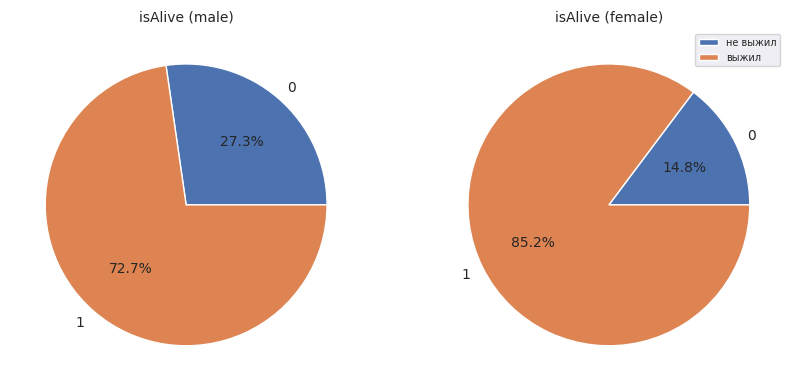

In [ ]:
# влияние признака male на выживаемость
data_1 = data[data['male']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('isAlive (male)', fontsize=10)
ax2.set_title('isAlive (female)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()
#среди женщин выживших больше

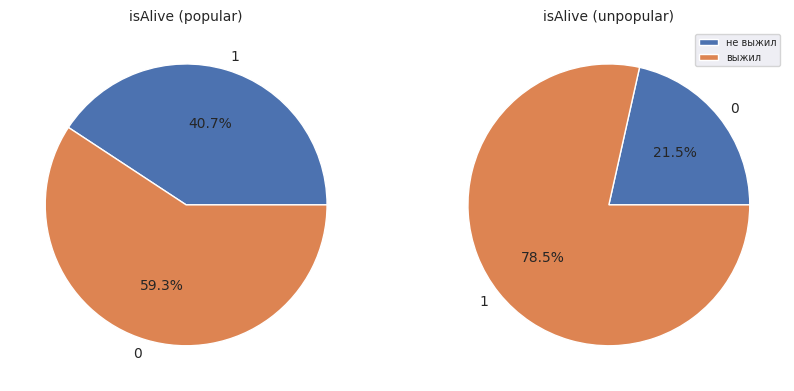

In [ ]:
#зависимость выживаемости от популярности:
data_1 = data[data['isPopular']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['isPopular']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('isAlive (popular)', fontsize=10)
ax2.set_title('isAlive (unpopular)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

#среди популярных персонажей намного больше мертвых

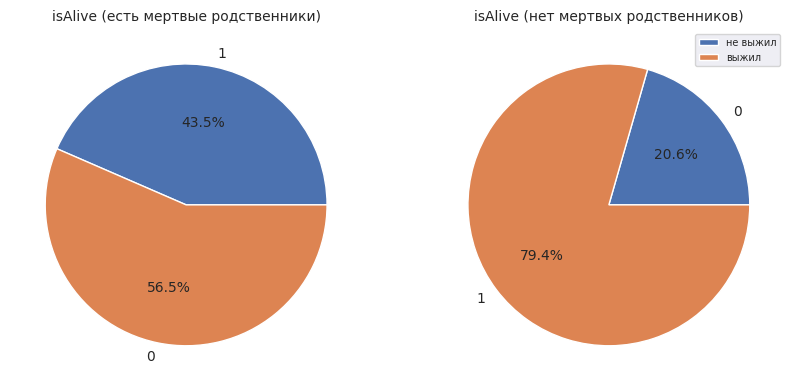

In [ ]:
#зависимость выживаемости от наличия мертвых родственников:
data_1 = data[data['boolDeadRelations']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['boolDeadRelations']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('isAlive (есть мертвые родственники)', fontsize=10)
ax2.set_title('isAlive (нет мертвых родственников)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

#среди персонажей с мертвыми родственниками намного больше мертвых

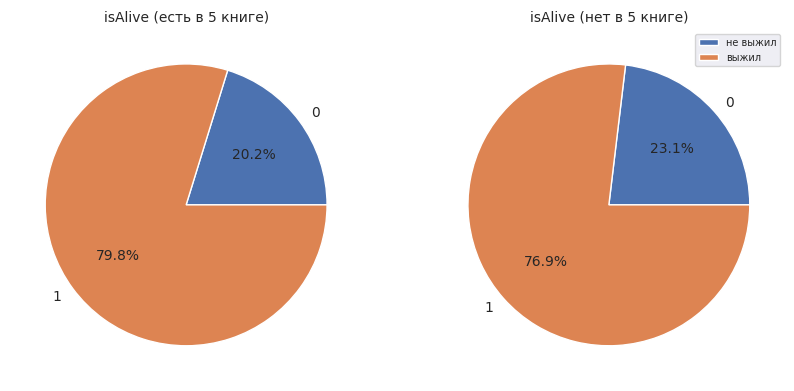

In [ ]:
#зависимость выживаемости от book:
data_1 = data[data['book5']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['book5']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})


ax1.set_title('isAlive (есть в 5 книге)', fontsize=10)
ax2.set_title('isAlive (нет в 5 книге)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

#разницы почти нет, удаляем признак book5

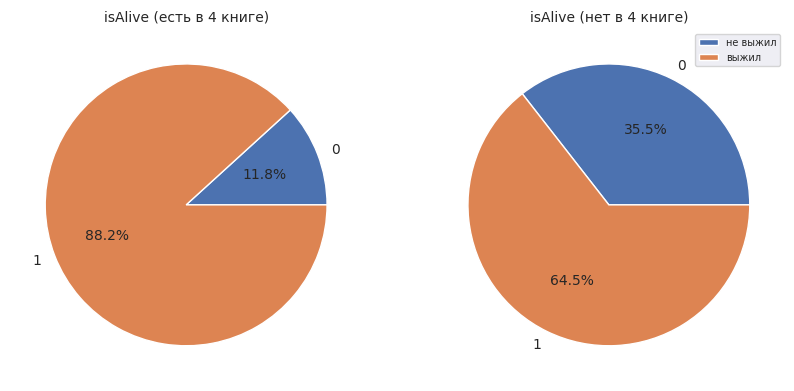

In [ ]:
#зависимость выживаемости от book:
data_1 = data[data['book4']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['book4']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})


ax1.set_title('isAlive (есть в 4 книге)', fontsize=10)
ax2.set_title('isAlive (нет в 4 книге)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

#разница есть

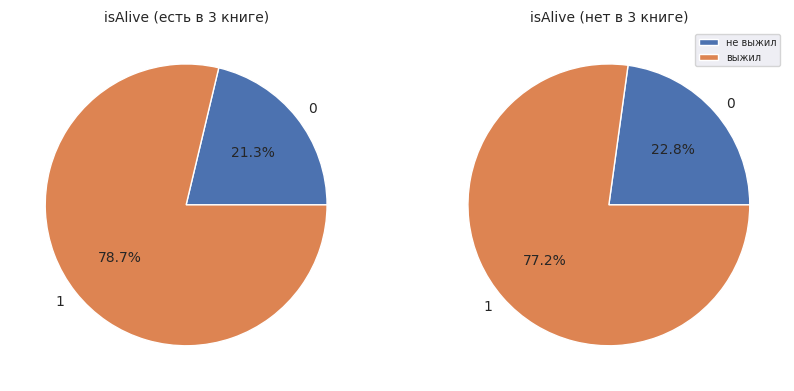

In [ ]:
#зависимость выживаемости от book:
data_1 = data[data['book3']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['book3']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})


ax1.set_title('isAlive (есть в 3 книге)', fontsize=10)
ax2.set_title('isAlive (нет в 3 книге)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

#разницы почти нет, удаляем признак book3

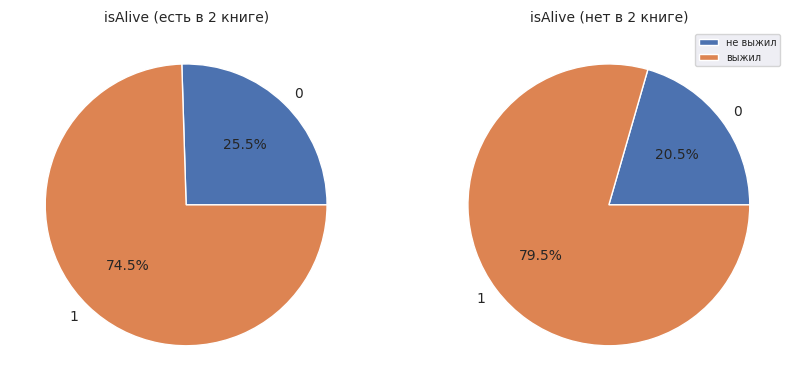

In [ ]:
#зависимость выживаемости от book:
data_1 = data[data['book2']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['book2']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})


ax1.set_title('isAlive (есть в 2 книге)', fontsize=10)
ax2.set_title('isAlive (нет в 2 книге)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

#разницы почти нет, удаляем признак book2

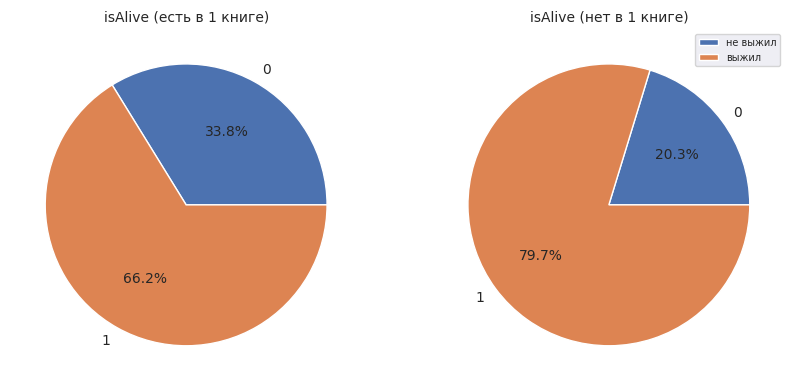

In [ ]:
#зависимость выживаемости от book:
data_1 = data[data['book1']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['book1']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})


ax1.set_title('isAlive (есть в 1 книге)', fontsize=10)
ax2.set_title('isAlive (нет в 1 книге)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

#разница есть

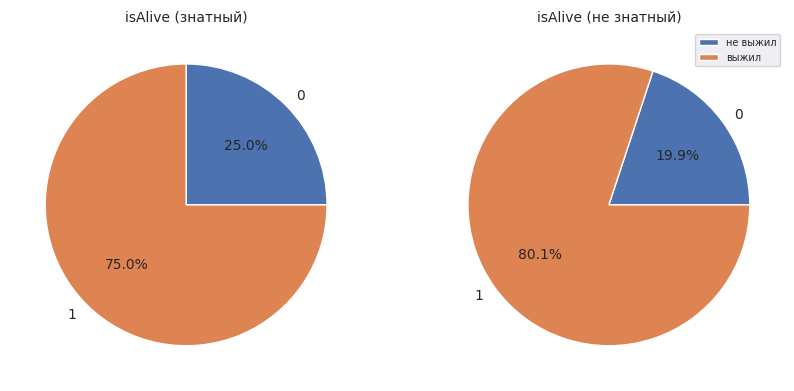

In [ ]:
#зависимость выживаемости от знатности:
data_1 = data[data['isNoble']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['isNoble']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})


ax1.set_title('isAlive (знатный)', fontsize=10)
ax2.set_title('isAlive (не знатный)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

#почти не зависит

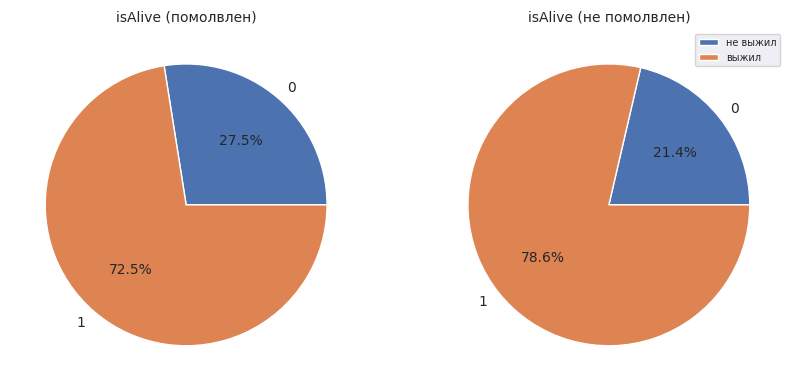

In [ ]:
#зависимость выживаемости от знатностиk:
data_1 = data[data['isMarried']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['isMarried']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})


ax1.set_title('isAlive (помолвлен)', fontsize=10)
ax2.set_title('isAlive (не помолвлен)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

#почти не зависит

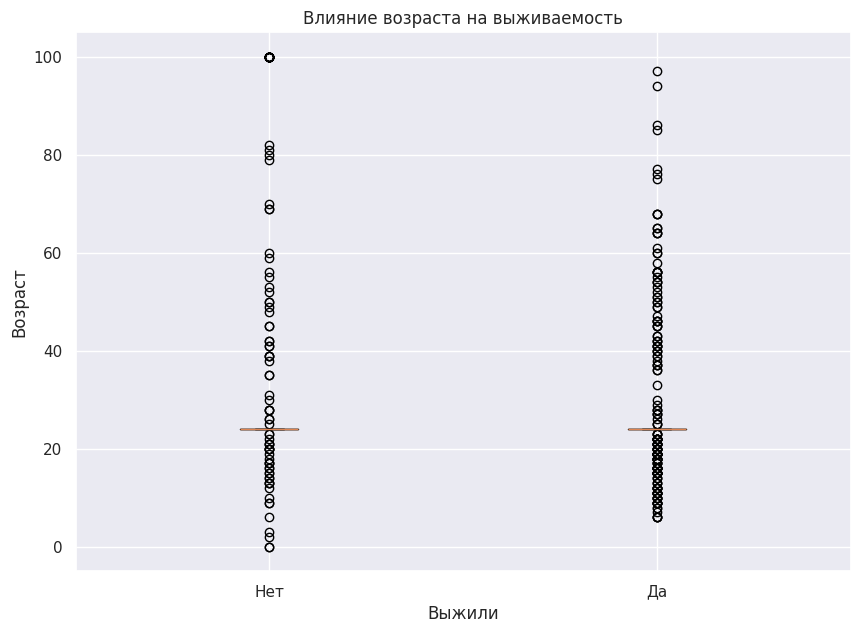

In [ ]:
#влияние возраста на выживаемость:
# Готовим данные для графика
data1 = data['age'][data['isAlive'] == 0]
data2 = data['age'][data['isAlive'] == 1]

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2])

plt.title('Влияние возраста на выживаемость')
plt.xlabel('Выжили')
plt.ylabel('Возраст')
plt.xticks([1, 2], ['Нет', 'Да'])

plt.show()

#видим, что межквартильный размах маленький, что логично - было много пропусков в данных и заполнили их медианой

In [ ]:
data_encoded.drop(columns=['book2', 'book3', 'book5', 'isMarried', 'isNoble'], inplace = True) #удаление ненужных столбцов

In [ ]:
data1_encoded.drop(columns=['book2', 'book3', 'book5', 'isMarried', 'isNoble'], inplace = True) #аналогично для тестовых данных

**Создал целевую переменную.**

In [ ]:
X = data_encoded.drop(columns=['isAlive']).values
y = data_encoded['isAlive'].values


 Разделил датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Создал и обучил несколько моделей.

In [ ]:
logistic_regression = LogisticRegression(C=1, max_iter=10000, n_jobs=-1)

logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

In [ ]:
random_forest_classifier = RandomForestClassifier(n_jobs=-1, min_samples_split=10, n_estimators=200)

random_forest_classifier.fit(X_train, y_train)

y_pred = random_forest_classifier.predict(X_test)


In [ ]:
ada_boost_classifier = AdaBoostClassifier(n_estimators=1000)

ada_boost_classifier.fit(X_train, y_train)

y_pred = ada_boost_classifier.predict(X_test)

In [ ]:
gaussian_process_classifier = GaussianProcessClassifier(max_iter_predict=100, n_jobs=-1)

gaussian_process_classifier.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=27, n_jobs=-1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
svc = SVC(max_iter=-1, kernel='poly')

svc.fit(X_train, y_train)

y_pred = random_forest_classifier.predict(X_test)

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=7)

decision_tree_classifier.fit(X_train, y_train)

y_pred = random_forest_classifier.predict(X_test)

## Часть 3. Оценка качества моделей

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8205


In [ ]:
y_pred = random_forest_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8269


In [ ]:
y_pred = ada_boost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8494


In [ ]:
y_pred = gaussian_process_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8429


In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8141


In [ ]:
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8365


In [ ]:
y_pred = decision_tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8365


Выбор лучшей модели:

In [ ]:
best_model = ada_boost_classifier

### Файл `submission.csv`

Вместо значений в `submission.csv` файле в колонке `isAlive` подставил свои предсказания и сохранил измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 12.2MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
y_pred = best_model.predict(data1_encoded.values) #предсказание на лучшей модели
submission['isAlive'] = y_pred #заменил значения в столбце предсказаний

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,0
...,...
1942,1
1943,1
1944,1


Соханение Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/final_submission.csv", index=False)

**Со степика**: Accuracy вашего решения равен **0.8174807197943444**. Это дает вам 5.0 баллов. Если вы хотите больше баллов, можете попробовать еще раз.